### MACHINE LEARNING PROJECT 1

#### TOPIC: FATAL ACCIDENTS PREDICTION IN UK
#### DATA: OPEN SOURSE DATA FROM UK DEPARTMENT OF TRANSPORT
##### BY BRIAN

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats

In [2]:
# Features pre-processing and principal component analysis (pca) 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# Train-test split
from sklearn.model_selection import train_test_split

# Classifiers 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier

# Classifiers ensembling
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from mlxtend.classifier import StackingClassifier

# Classifiers evaluation metrics
from sklearn.metrics import accuracy_score, roc_auc_score, auc, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef

# Random resampling
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Tuning hyperparameters
from sklearn.model_selection import RandomizedSearchCV

# Other
from time import time
from scipy.stats import ttest_ind

# Ploting
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from IPython.display import display
pd.options.display.float_format = '{:.3f}'.format

# Suppressing annoying harmless error
import warnings
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# define new print function which contains color option
import sys

python_print = print

def print(*objects, sep=' ', end='\n', file=sys.stdout, color=(), fit_len=-1):
    line = "".join(map(str, objects))
    fit_len = max(fit_len - len(line), 0)
    for c in color:
        if len(objects) > 1:
            objects = (f"\033[{c}m{objects[0]}",) + objects[1:-1] + (
                f"{objects[-1]}{' ' * fit_len}\033[0m",)
        elif len(objects) == 1:
            objects = (f"\033[{c}m{objects[0]}{' ' * fit_len}\033[0m",)
    python_print(*objects, sep=sep, end=end, file=file)

## Step 1: Data preprocessing

In [4]:
# download dataset
!wget https://raw.githubusercontent.com/skyu0221/online-dropbox/master/ml/capstone1/project1/UK_RoadSafety_Accidents.csv

# load data
df = pd.read_csv("UK_RoadSafety_Accidents.csv") # df=dataframe

--2020-07-26 23:06:56--  https://raw.githubusercontent.com/skyu0221/online-dropbox/master/ml/capstone1/project1/UK_RoadSafety_Accidents.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18721065 (18M) [text/plain]
Saving to: ‘UK_RoadSafety_Accidents.csv’

UK_RoadSafety_Accid 100%[===================>]  17.85M  42.9MB/s    in 0.4s    

2020-07-26 23:06:57 (42.9 MB/s) - ‘UK_RoadSafety_Accidents.csv’ saved [18721065/18721065]



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# print info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136621 entries, 0 to 136620
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               136621 non-null  object 
 1   Location_Easting_OSGR                        136614 non-null  float64
 2   Location_Northing_OSGR                       136614 non-null  float64
 3   Longitude                                    136614 non-null  float64
 4   Latitude                                     136614 non-null  float64
 5   Police_Force                                 136621 non-null  int64  
 6   Accident_Severity                            136621 non-null  int64  
 7   Number_of_Vehicles                           136621 non-null  int64  
 8   Number_of_Casualties                         136621 non-null  int64  
 9   Date                                         136621 non-nul

## Step 2: Data Cleaning


In [6]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2016010000005,519310.000,188730.000,-0.279,51.585,1,3,2,1,01/11/2016,3,02:30,28,E09000005,3,4006,6,30.000,0,-1,-1,0,0,0,5,1,1,0,0,1,1,E01000543
1,2016010000006,551920.000,174560.000,0.185,51.450,1,3,1,1,01/11/2016,3,00:37,18,E09000004,3,207,6,30.000,9,4,6,0,0,0,4,1,1,0,0,1,1,E01000375
2,2016010000008,505930.000,183850.000,-0.474,51.544,1,3,1,1,01/11/2016,3,01:25,26,E09000017,3,4020,1,30.000,1,4,3,4020,0,0,4,1,1,0,0,1,1,E01033725
3,2016010000016,527770.000,168930.000,-0.164,51.405,1,3,1,1,01/11/2016,3,09:15,22,E09000024,3,217,6,30.000,3,2,3,217,0,0,1,1,1,0,0,1,1,E01003379
4,2016010000018,510740.000,177230.000,-0.407,51.483,1,3,2,1,01/11/2016,3,07:53,25,E09000018,3,312,3,40.000,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002583


In [7]:
df.shape

(136621, 32)

In [8]:
print(df.isnull().sum())

Accident_Index                                    0
Location_Easting_OSGR                             7
Location_Northing_OSGR                            7
Longitude                                         7
Latitude                                          7
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                              2
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                      37
Junction_Detail                                   0
Junction_Con

In [9]:
# LSOA_of_Accident_Location stands for "Lower Super Ouput Area of 
# Accident_Location (England & Wales only)", therefore it's not very useful
df = df.drop(['LSOA_of_Accident_Location'], axis=1)
df = df.dropna(axis=0, how='any') ## side note: axis=0 means x-axis, axis=1 means y-axis.

In [10]:
# re-run previous fn
print(df.isnull().sum()) # isnull fn: true=1, false=0

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class      

In [11]:
df.shape[0] # number of lines remaining

136575

In [12]:
df.head(5)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,2016010000005,519310.000,188730.000,-0.279,51.585,1,3,2,1,01/11/2016,3,02:30,28,E09000005,3,4006,6,30.000,0,-1,-1,0,0,0,5,1,1,0,0,1,1
1,2016010000006,551920.000,174560.000,0.185,51.450,1,3,1,1,01/11/2016,3,00:37,18,E09000004,3,207,6,30.000,9,4,6,0,0,0,4,1,1,0,0,1,1
2,2016010000008,505930.000,183850.000,-0.474,51.544,1,3,1,1,01/11/2016,3,01:25,26,E09000017,3,4020,1,30.000,1,4,3,4020,0,0,4,1,1,0,0,1,1
3,2016010000016,527770.000,168930.000,-0.164,51.405,1,3,1,1,01/11/2016,3,09:15,22,E09000024,3,217,6,30.000,3,2,3,217,0,0,1,1,1,0,0,1,1
4,2016010000018,510740.000,177230.000,-0.407,51.483,1,3,2,1,01/11/2016,3,07:53,25,E09000018,3,312,3,40.000,0,-1,-1,0,0,0,1,1,1,0,0,1,1


## Step 3: Data Analysis

#### Step 3-0: Aggregation (re-define)
Original accident severty contains 3 levels: Fatal (1)/ Serious (2)/ Slight (3);\
New accident severty contains 2 levels: Fatal OR Serious (1)/ Slight (0).

In [13]:
# re-define the index of levels to 0 and 1
df['Serious_Accident'] = 1
df['Serious_Accident'][df['Accident_Severity'] == 3] = 0
print('Count of outcome variable: \n', df['Serious_Accident'].value_counts())

Count of outcome variable: 
 0    113160
1     23415
Name: Serious_Accident, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


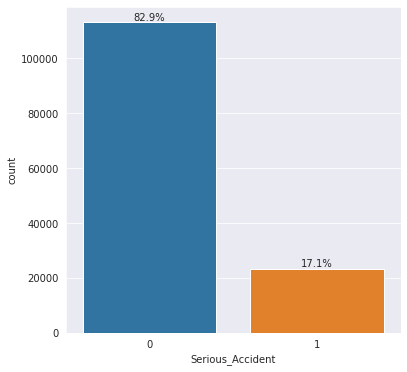

In [16]:
# Count plot 
plt.figure(figsize=(6,6))
ax = sns.countplot(x=df.Serious_Accident)

# get the percentage above each histogram
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100. * y / df['Serious_Accident'].value_counts().sum()), (x.mean(), y),
                ha='center', va='bottom') # set the alignment of the text
plt.show()

#### Step 3-1: Observing 

**Latitude & Longitude**

In [17]:
# rename samples for convenience
slight = df[df['Serious_Accident'] == 0]
serious = df[df['Serious_Accident'] == 1] # slight and serious are dataframes

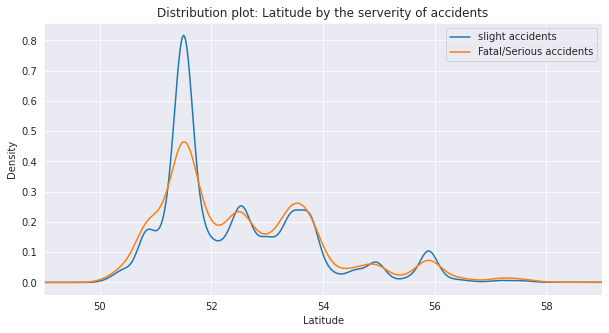

In [25]:
plt.figure(figsize=(10,5))
# Latitude
slight.Latitude.plot.density(label="slight accidents")
serious.Latitude.plot.density(label="Fatal/Serious accidents")
plt.legend()
plt.title('Distribution plot: Latitude by the serverity of accidents')
plt.xlim((49, 59))
plt.xlabel("Latitude")
plt.show()